#Steps to build a Neural Network in NumPy
1. Loading the dataset (Input and Output)
2. Architecture of the model (# input, hidden and output neurons)
3. Initializing the weights for all the layers
4. Implementing forward propagation
5. Implementing backward propagation
6. Train the model for n epochs

## 1. Loading the dataset (Input and Output)

In [1]:
# importing required libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Version of Numpy
print("Version of numpy:",np.__version__)

Version of numpy: 1.18.1


In [5]:
#Version of Matplotlib
print("Version of matplotlib:",matplotlib.__version__)

Version of matplotlib: 3.1.3


In [17]:
#Creating the input array
X=np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1]])
print('\n Input:')
print(X)
#shape of input array
print("\n Shape of input:", X.shape)



 Input:
[[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]

 Shape of input: (3, 4)


In [18]:
##Converting array into matrix
X=X.T
print('\n Input in matrix form:')
print(X)
# shape of input matrix
print('\n Shape of Input Matrix:', X.shape)




 Input in matrix form:
[[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]

 Shape of Input Matrix: (4, 3)


In [19]:
# creating the output array
y=np.array([[1],[1],[0]])
print ('\n Actual Output:')
print(y)

# output in matrix form
y = y.T

print ('\n Output in matrix form:')
print(y)

# shape of input array
print('\n Shape of Output:', y.shape)


 Actual Output:
[[1]
 [1]
 [0]]

 Output in matrix form:
[[1 1 0]]

 Shape of Output: (1, 3)


## 2. Architecture of the model (# input, hidden and output neurons)## 2. Architecture of the model (# input, hidden and output neurons)

In [21]:
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

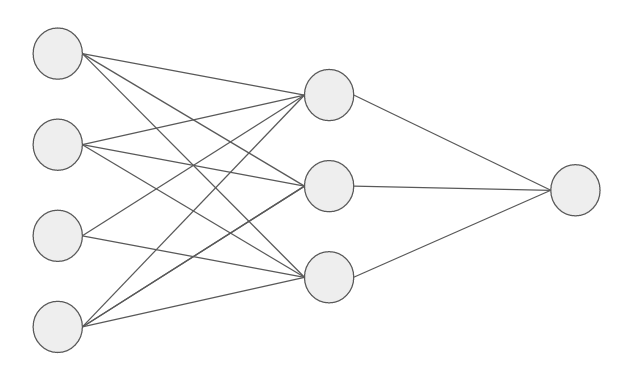

## 3. Initializing the weights for all the layers

NOTE: For simplicity, we are assuming that the bias for all the layers is 0

In [22]:
# initializing weight
# Shape of w_ih should number of neurons at input layer X number of neurons at hidden layer
w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
# Shape of w_ho should number of neurons at hidden layer X number of neurons at output layer
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

In [23]:
# shape of weight matrix
w_ih.shape, w_ho.shape

((4, 3), (3, 1))

## 4. Implementing forward propagation

![alt text](https://drive.google.com/uc?id=1YwD7vY9k84vZmjmE5CXgQ69fYyadPsox)

In [24]:
# We are using sigmoid as an activation function so defining the sigmoid function here

# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [31]:
# hidden layer activations

hidden_layer_input=np.dot(w_ih.T,X)
hiddenlayer_activations = sigmoid(hidden_layer_input)
hiddenlayer_activations

array([[0.75329206, 0.84521568, 0.64710501],
       [0.76063493, 0.77445129, 0.54973356],
       [0.54894798, 0.63592355, 0.73403853]])

![alt text](https://drive.google.com/uc?id=1ETMoLD1fwi5u1HHLqtAdVUs-P8HNOU_p)

In [27]:
# calculating the output
output_layer_input=np.dot(w_ho.T,hiddenlayer_activations)
output = sigmoid(output_layer_input)

In [28]:
# output
output

array([[0.80021924, 0.8163634 , 0.77238518]])

## 5. Implementing backward propagation

![alt text](https://drive.google.com/uc?id=1uYdg4mQL-B9o7BTOLnfoYUhh_LxTnpcW)

In [30]:
# calculating error
error = np.square(y-output)/2

### Rate of change of error w.r.t weight between hidden and output layer


![alt text](https://drive.google.com/uc?id=1_KexjgVJGRptZ6t1eobTter3mfIGo9rs)

a. Rate of change of error w.r.t output

b. Rate of change of output w.r.t Z2

c. Rate of change of Z2 w.r.t weights between hidden and output layer



In [32]:
# rate of change of error w.r.t. output
error_wrt_output = -(y-output)

In [33]:
# rate of change of output w.r.t. Z2
output_wrt_Z2 = np.multiply(output,(1-output))

In [34]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
Z2_wrt_who = hiddenlayer_activations

In [37]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_who.shape

((1, 3), (1, 3), (3, 3))

In [38]:
# shape of weights of output layer
w_ho.shape

(3, 1)

![alt text](https://drive.google.com/uc?id=1VesmZOVpfgLFESvOFd7dE-YHNtSMMkvM)

In [41]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)

In [42]:
error_wrt_who.shape

(3, 1)

### Rate of change of error w.r.t weight between input and hidden layer

![alt text](https://drive.google.com/uc?id=1X4-iInwlv7ber3fwgtqHuHTuFRci-tMV)

**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t hidden layer activations**

**d. Rate of change of hidden layer activations w.r.t Z1**

**e. Rate of change of Z1 w.r.t weights between input and hidden layer**

In [43]:
# rate of change of error w.r.t. output
error_wrt_output = -(y-output)

In [44]:
# rate of change of output w.r.t. Z2
output_wrt_Z2 = np.multiply(output,(1-output))

In [45]:
# rate of change of Z2 w.r.t. hidden layer activations
Z2_wrt_h1 = w_ho


In [46]:
# rate of change of hidden layer activations w.r.t. Z1
h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))

In [47]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
Z1_wrt_wih = X

In [48]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_h1.shape, h1_wrt_Z1.shape, Z1_wrt_wih.shape

((1, 3), (1, 3), (3, 1), (3, 3), (4, 3))

In [49]:
# shape of weights of hidden layer
w_ih.shape

(4, 3)

![alt text](https://drive.google.com/uc?id=1RkG5x1NEFWlF3tj0OlswOWvBcV5XNV1C)

In [50]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(output_wrt_Z2*error_wrt_output))).T)

### Update the parameters

![alt text](https://drive.google.com/uc?id=1A5jaB3WjZx9yrJkk9imVEvP3PZodjapE)

In [53]:
# defining the learning rate
lr = 0.01

In [54]:
# initial w_ho and w_ih
w_ho

array([[0.53012283],
       [0.94739687],
       [0.48766859]])

In [55]:
w_ih

array([[0.13178721, 0.89647047, 0.04974663],
       [0.02502662, 0.12213923, 0.6539166 ],
       [0.98446058, 0.25969315, 0.14667438],
       [0.58131141, 0.07745499, 0.36129347]])

In [56]:
# updating the weights of output layer
w_ho = w_ho - lr * error_wrt_who

In [57]:
# updating the weights of hidden layer
w_ih = w_ih - lr * error_wrt_wih

In [58]:
w_ho

array([[0.5297174 ],
       [0.94710653],
       [0.48702223]])

In [59]:
w_ih

array([[0.13183777, 0.89657112, 0.04981628],
       [0.02486223, 0.1218208 , 0.65378732],
       [0.98451114, 0.2597938 , 0.14674403],
       [0.58116612, 0.07718212, 0.36119528]])

## 6. Training the model for n epochs

In [61]:
# defining the model architecture
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

# initializing weight
w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

# defining the parameters
lr = 0.01
epochs = 10000


In [62]:
w_ho

array([[0.72063598],
       [0.34045637],
       [0.01123353]])

In [63]:
w_ih

array([[0.85880282, 0.72334139, 0.43049454],
       [0.49183244, 0.52831856, 0.60500143],
       [0.82417662, 0.77412845, 0.78866184],
       [0.54368226, 0.2628018 , 0.52159089]])

In [66]:
error_epoch=[]
for i in range(epochs):
    # Forward Propogation
    
    # hidden layer activations
    hidden_layer_input=np.dot(w_ih.T,X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)    
    # calculating the output
    output_layer_input=np.dot(w_ho.T,hiddenlayer_activations)
    output = sigmoid(output_layer_input)
     ##Backward Propagation
    
    # calculating error
    error = np.square(y-output)/2
    error_wrt_output = -(y-output)
    output_wrt_Z2 = np.multiply(output,(1-output))
    Z2_wrt_who = hiddenlayer_activations
    # rate of change of error w.r.t weight between hidden and output layer
    error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)
    Z2_wrt_h1 = w_ho
    h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))
    Z1_wrt_wih = X
    # rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(error_wrt_output*output_wrt_Z2))).T)

    # updating the weights between hidden and output layer
    w_ho = w_ho - lr * error_wrt_who
    # updating the weights between input and hidden layer
    w_ih = w_ih - lr * error_wrt_wih
    
    # appending the error of each epoch
    error_epoch.append(np.average(error))

In [67]:
error_epoch

[0.10507701578229207,
 0.10507188090871626,
 0.10506675182502838,
 0.10506162849091905,
 0.10505651086625113,
 0.10505139891105975,
 0.10504629258555113,
 0.1050411918501023,
 0.10503609666526044,
 0.10503100699174223,
 0.10502592279043337,
 0.10502084402238786,
 0.10501577064882746,
 0.1050107026311412,
 0.10500563993088448,
 0.10500058250977895,
 0.10499553032971143,
 0.10499048335273366,
 0.1049854415410615,
 0.10498040485707456,
 0.10497537326331534,
 0.10497034672248894,
 0.10496532519746209,
 0.10496030865126298,
 0.10495529704708044,
 0.10495029034826321,
 0.1049452885183198,
 0.10494029152091744,
 0.10493529931988183,
 0.10493031187919621,
 0.10492532916300124,
 0.10492035113559399,
 0.10491537776142755,
 0.10491040900511044,
 0.10490544483140603,
 0.10490048520523192,
 0.10489553009165942,
 0.10489057945591286,
 0.10488563326336915,
 0.10488069147955721,
 0.10487575407015713,
 0.10487082100099994,
 0.10486589223806682,
 0.10486096774748865,
 0.10485604749554535,
 0.10485113144

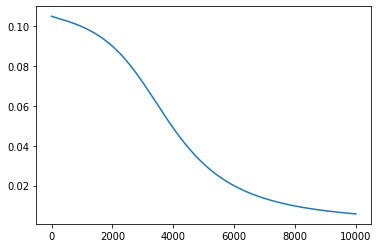

In [68]:
# visualizing the error after each epoch
plt.plot(np.arange(1,epochs+1), np.array(error_epoch))

In [69]:
# final output from the model
output

array([[0.95318908, 0.90441729, 0.15276058]])

In [70]:
# actual target
y

array([[1, 1, 0]])

In [71]:
# error at last epoch
error

array([[0.00109563, 0.00456803, 0.0116679 ]])